In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn as sns


In [40]:
#read the file
df1= pd.read_csv('Documents/GitHub/IF/data.csv')
df1.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,4-Jan,8.28,6.93,1.24,106.48,0.018991,0.155518,0.112978,0.182694,0.060531,...,1.055785,0.959459,0.903187,0.992303,0.951446,0.923723,0.019634,-0.005604,0.101181,0.026993
1,4-Feb,8.28,6.77,1.24,106.55,0.019552,0.173791,0.123553,0.197181,0.062438,...,1.058788,0.970922,0.906163,0.992006,0.953512,0.923310,0.019634,-0.005604,0.101181,0.026993
2,4-Mar,8.28,6.64,1.28,108.62,0.020094,0.221002,0.141914,0.227796,0.076555,...,1.058556,0.973295,0.901913,0.993889,0.953608,0.923854,0.019634,-0.005604,0.101181,0.026993
3,4-Apr,8.28,6.56,1.30,107.25,0.019944,0.222297,0.136795,0.204015,0.071361,...,1.063627,0.978012,0.908809,0.990508,0.956701,0.931846,0.019121,-0.014133,0.101861,0.027576
4,4-May,8.28,6.79,1.28,112.35,0.020147,0.194379,0.138205,0.186367,0.066312,...,1.052013,0.978698,0.910850,0.990748,0.955716,0.939221,0.019121,-0.014133,0.101861,0.027576


In [44]:
# choose the data started from 2007-02 and stop on 2018-06
df=df1.drop(range(0, 37),)
df.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv',sep=',')
df=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv')
df=df.iloc[:137, 1:]
df.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
0,7-Feb,7.75,7.17,1.24,120.45,0.022279,0.184524,0.156641,0.220458,0.088510,...,1.027975,1.004013,0.993803,1.011551,1.007261,0.991670,0.045397,-0.088698,0.112059,0.031747
1,7-Mar,7.74,7.35,1.22,117.28,0.023089,0.217070,0.176128,0.252445,0.102046,...,1.019118,1.010500,1.002075,1.012849,1.004137,0.997451,0.045397,-0.088698,0.112059,0.031747
2,7-Apr,7.72,7.12,1.21,118.83,0.022811,0.230439,0.162478,0.220921,0.093913,...,1.009623,1.019027,1.009303,1.008496,1.010309,1.003305,0.048586,-0.095974,0.112575,0.032114
3,7-May,7.67,7.02,1.22,120.73,0.023013,0.204929,0.176713,0.241660,0.096689,...,1.002863,1.021423,1.018314,1.014282,1.009250,1.008266,0.048586,-0.095974,0.112575,0.032114
4,7-Jun,7.63,7.17,1.23,122.62,0.023133,0.212815,0.175452,0.241184,0.101050,...,0.995454,1.021731,1.033646,1.013798,1.012358,1.009219,0.048586,-0.095974,0.112575,0.032114


In [45]:
# describe the data
df.describe()



,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,...,USD tot,CNY tnt,ZA tnt,CHF tnt,JPY tnt,USD tnt,CNY nfa,ZA nfa,CHF nfa,JPY nfa
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,6.606934,9.931825,0.997664,100.889197,0.023740,0.148240,0.166965,0.258644,0.092731,52.816788,...,0.998311,0.931056,1.090514,0.985733,1.010421,1.002393,0.045746,-0.145655,0.097557,0.030258
std,0.405935,2.664483,0.093441,13.900001,0.001729,0.032706,0.019546,0.045219,0.010789,5.248929,...,0.031560,0.078714,0.066601,0.025015,0.022300,0.025801,0.009771,0.016457,0.004249,0.002138
min,6.100000,6.700000,0.780000,76.770000,0.019337,0.082851,0.118153,0.171324,0.056192,33.100000,...,0.892476,0.783453,0.961065,0.941437,0.956175,0.956126,0.029831,-0.165285,0.092550,0.027129
25%,6.300000,7.600000,0.940000,90.290000,0.022437,0.119854,0.154210,0.219659,0.086557,50.800000,...,0.980989,0.852701,1.018596,0.956353,0.997936,0.989097,0.037068,-0.157901,0.095461,0.028103
50%,6.560000,9.180000,0.970000,102.130000,0.023549,0.145372,0.165935,0.257943,0.093542,53.000000,...,0.995530,0.953135,1.134978,0.990106,1.013528,0.999888,0.045473,-0.146286,0.096866,0.030005
75%,6.830000,12.090000,1.040000,112.340000,0.025204,0.169366,0.178138,0.292126,0.100954,56.500000,...,1.026417,1.002772,1.145675,1.002698,1.026667,1.006810,0.055715,-0.137957,0.097584,0.032272
max,7.750000,16.390000,1.240000,123.750000,0.026837,0.230439,0.230570,0.408002,0.117965,60.800000,...,1.062587,1.058705,1.158477,1.035381,1.071573,1.130300,0.061744,-0.088698,0.112575,0.033481


In [46]:
# operate on the Chinese data firstly. take log on each variable(keep M2YoY unchanged )
df['lZA'] = np.log(df[['ZA']])
df['lZA TO'] = np.log(df[['ZA TO']])
df['lZA PMI'] = np.log(df[['ZA PMI']])
df['lZA tot']=np.log(df['ZA tot']/df['USD tot'])
df['lZA tnt']=np.log(df['ZA tnt']/df['USD tnt'])
# take ADF test on these 4 variables to check its stableness
print(ts.adfuller(df['lZA']))
print(ts.adfuller(df['lZA TO']))
print(ts.adfuller(df['lZA PMI']))
print(ts.adfuller(df['ZA M2YoY']))
print(ts.adfuller(df['lZA tot']))
print(ts.adfuller(df['lZA tnt']))
print(ts.adfuller(df['ZA nfa']))
# raw data not stable under 1% significant level



(-0.9488747948705246, 0.7714516764400888, 2, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -472.2143506272256)
(-2.871400231648822, 0.04877627454781149, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -325.54872326251166)
(-1.5538071653166163, 0.506745918619923, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -287.0748679898686)
(-3.014144756446564, 0.0335944065220358, 12, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, 402.47248758657713)
(-2.3454064067391767, 0.15774123001035684, 0, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -679.0512687380572)
(-0.994648407307264, 0.7552111637003016, 0, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -770.2922084863906)
(-2.031425391977213, 0.2729663646457257, 6, 130, {'1%': -3.4816817173418295, '5%'

In [47]:

# take first-order and conduct ADF test
df['difflZA'] = df['lZA'].diff(periods = 1)
df['difflZA TO'] = df['lZA TO'].diff(periods = 1)
df['difflZA PMI'] = df['lZA PMI'].diff(periods = 1)
df['diffZA M2YoY'] = df['ZA M2YoY'].diff(periods = 1)
df['difflZA tot'] = df['lZA tot'].diff(periods = 1)
df['difflZA tnt'] = df['lZA tnt'].diff(periods = 1)
df['diffZA nfa'] = df['ZA nfa'].diff(periods = 1)

print(ts.adfuller(df['difflZA'].drop(0,)))
print(ts.adfuller(df['difflZA TO'].drop(0,)))
print(ts.adfuller(df['difflZA PMI'].drop(0,)))
print(ts.adfuller(df['diffZA M2YoY'].drop(0,)))
print(ts.adfuller(df['difflZA tot'].drop(0,)))
print(ts.adfuller(df['difflZA tnt'].drop(0,)))
print(ts.adfuller(df['diffZA nfa'].drop(0,)))
# all the 

(-8.322263916190055, 3.5464354586179394e-13, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -469.71455953910584)
(-3.3163414949921313, 0.014163625391568638, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, -322.96457372199507)
(-3.867559106150442, 0.002286999210001837, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -285.2829535168182)
(-3.515457372630946, 0.007598877543637838, 11, 124, {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}, 407.4041546361194)
(-11.72315178250921, 1.3977440221704806e-21, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -672.3475967435351)
(-11.32636557890313, 1.140885699860202e-20, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -759.9333492979414)
(-2.922225950840624, 0.042823797682433794, 5, 130, {'1%': -3.4816817173418295,

In [48]:

df['lZA_1'] = 0
size_sample = 136

for i in range(size_sample):
    df.loc[i,'lZA_1'] = df.loc[i+1,'difflZA']
    
df.loc[size_sample,'lZA_1'] = df.loc[0,'difflZA']



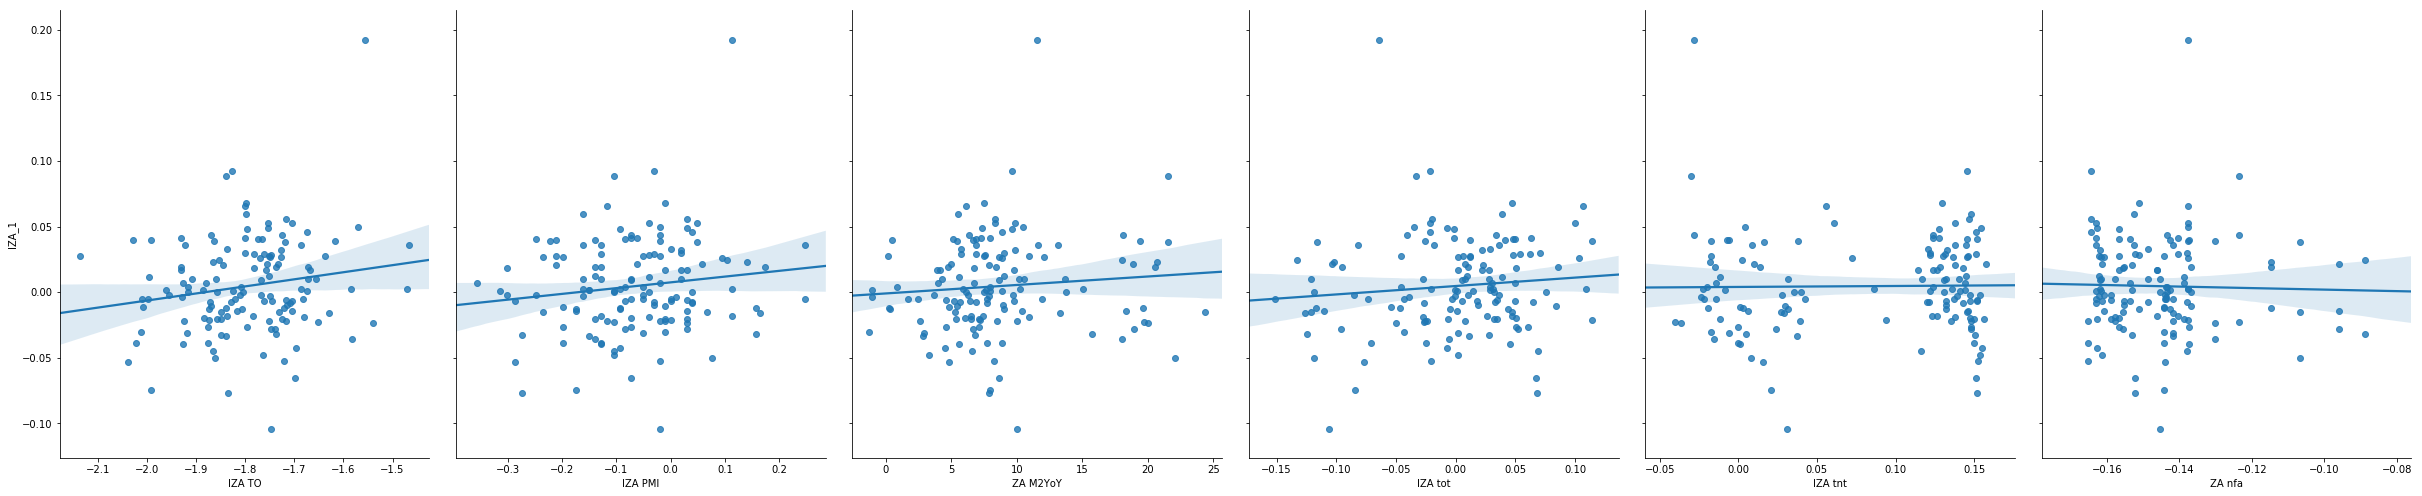

In [49]:
# check relation
sns.pairplot(df, x_vars=['lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa'], y_vars='lZA_1', size=7, aspect=0.8, kind='reg')  
plt.show()


In [50]:
# run regression with whole data
df['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lZA_1'], exog=df[['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']], missing='drop')
results = reg_int.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  lZA_1   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.150
Date:                Wed, 07 Nov 2018   Prob (F-statistic):             0.0520
Time:                        20:55:34   Log-Likelihood:                 263.43
No. Observations:                 136   AIC:                            -512.9
Df Residuals:                     129   BIC:                            -492.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0618      0.106     -0.581      0.5

In [51]:
#results.resid
print(ts.adfuller(results.resid))



(-8.25757771999994, 5.18705422845268e-13, 1, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -476.9650114822192)


In [52]:

# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 60

fcst_beer60 = np.zeros(size_sample - size_subsample)
fcst_error_beer60 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lZA_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer60[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]]) - df.loc[size_subsample+i, 'lZA_1']
    fcst_error_beer60[i] = error
    
fcst_error_beer60=np.where(np.isnan(fcst_error_beer60),0,fcst_error_beer60)
fcst_error_beer60
#fcst_beer

array([-0.01445728, -0.04569018, -0.06539949, -0.04050561,  0.00370039,
       -0.01629352, -0.00926886, -0.05163419, -0.01853065,  0.02604354,
       -0.02565401, -0.03069395, -0.0302737 ,  0.02237422, -0.00769258,
       -0.05071976,  0.03720805,  0.00147174,  0.03661151,  0.02635026,
       -0.01233718, -0.00219772, -0.02983672, -0.00832619,  0.03307221,
        0.01370454,  0.03733143, -0.00785159,  0.02901157,  0.01581445,
       -0.00529733,  0.00501075,  0.01476802, -0.00103681,  0.01672219,
        0.02927855, -0.02064758,  0.01937245,  0.01853825, -0.00929688,
        0.00717124, -0.03036176, -0.04543249,  0.01516773, -0.03547197,
       -0.03951986, -0.06332284,  0.07022185,  0.04396177,  0.07049188,
       -0.03344545,  0.02981459,  0.03424554,  0.03047597, -0.03696909,
        0.00688493,  0.01131014,  0.00137234,  0.02511005,  0.03006696,
        0.03033644, -0.04755777, -0.00030469,  0.0291788 , -0.03956849,
       -0.0234512 , -0.01216593, -0.05529171, -0.03395571,  0.07

In [53]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 30

fcst_beer30 = np.zeros(size_sample - size_subsample)
fcst_error_beer30 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lZA_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer30[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]]) - df.loc[size_subsample+i, 'lZA_1']
    fcst_error_beer30[i] = error
    
fcst_error_beer30=np.where(np.isnan(fcst_error_beer30),0,fcst_error_beer30)



In [54]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 90

fcst_beer90 = np.zeros(size_sample - size_subsample)
fcst_error_beer90 = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lZA_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer90[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lZA TO','lZA PMI','ZA M2YoY','lZA tot','lZA tnt','ZA nfa']]]) - df.loc[size_subsample+i, 'lZA_1']
    fcst_error_beer90[i] = error
    
fcst_error_beer90=np.where(np.isnan(fcst_error_beer90),0,fcst_error_beer90)


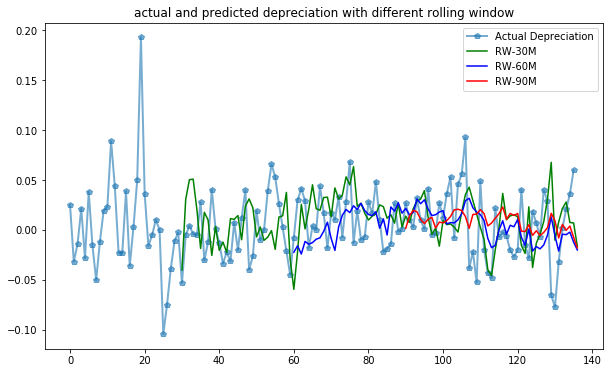

In [55]:

#改变rolling window 长度
df_d = df.set_index('date')
fig, ax = plt.subplots(figsize = (10, 6))

y = df['lZA_1']
ax.plot(y, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)

v1=np.append(np.zeros(30),fcst_beer30)
v1[v1==0]=None
ax.plot(v1, 'g-',label = 'RW-30M')
ax.legend()

v2=np.append(np.zeros(60),fcst_beer60)
v2[v2==0]=None
ax.plot(v2, 'b-',label = 'RW-60M')
ax.legend()

v3=np.append(np.zeros(90),fcst_beer90)
v3[v3==0]=None
ax.plot(v3, 'r-',label = 'RW-90M')
ax.legend()

ax.set_title('actual and predicted depreciation with different rolling window') 

plt.show()


In [56]:
# Compute RMSE for the Beer model
rmse_beer60 = np.sqrt(np.mean(fcst_error_beer60**2))
rmse_beer60


0.03364987775529696

In [57]:

rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lZA_1']**2))
rmse_rw


0.03561349712141707

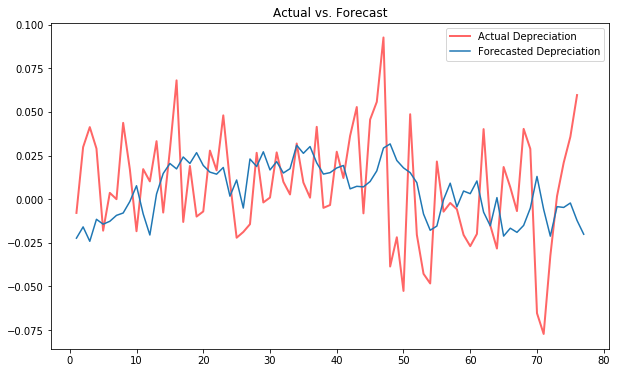

In [58]:
df_d = df.set_index('date')
size_subsample=60
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()
# size_subsample no need to +1
#x=df.loc[size_subsample: size_sample,'date']
yB1 = df.loc[size_subsample: size_sample, 'lZA_1']
ax.plot(x, yB1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yB2 = fcst_beer60
ax.plot(x, yB2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()

In [59]:
#比值偏离度
devB1=(yB1-yB2)/yB2
devB1.describe()

count    76.000000
mean     -1.176607
std       6.391913
min     -32.411497
25%      -2.884712
50%      -1.144261
75%       0.444497
max      26.689682
Name: lZA_1, dtype: float64

In [60]:
devB2=yB1-yB2
devB2.describe()

count    76.000000
mean      0.002088
std       0.034031
min      -0.078319
25%      -0.025343
50%       0.001617
75%       0.030296
max       0.071818
Name: lZA_1, dtype: float64

In [61]:

#homework replicate
dfhw1 = pd.read_csv('Documents/GitHub/IF/data-HW.csv')
dfhw1.head()


,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
0,7-Jan,7.7898,7.19,1.24,120.58,1.94,8.70,2.12,0.43,5.10,...,55.1,50.6,62.4,NaN,49.5,88.38,92.23,98.5578,84.74,108.91
1,7-Feb,7.7546,7.17,1.24,120.45,1.91,8.66,2.13,0.59,5.11,...,53.1,57.8,64.4,53.0,51.9,89.59,91.48,98.7527,83.20,108.37
2,7-Mar,7.7391,7.35,1.22,117.28,1.95,8.28,2.24,0.56,5.02,...,56.1,59.1,61.5,52.5,50.7,88.16,88.88,98.8296,85.50,108.65
3,7-Apr,7.7247,7.12,1.21,118.83,2.05,8.28,2.30,0.58,4.84,...,58.6,54.0,61.8,52.3,52.6,87.07,91.24,99.9483,83.44,107.55
4,7-May,7.6704,7.02,1.22,120.73,2.08,8.50,2.36,0.58,4.71,...,55.7,55.5,60.4,51.4,52.5,87.66,92.23,100.1821,81.45,106.82


In [62]:

# choose the data started from 2007-02 and stop on 2018-06
dfhw=dfhw1.drop(range(0, 1),)
dfhw.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv',sep=',')
dfhw=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata1.csv')
dfhw=dfhw.iloc[:137, 1:]
dfhw.tail()


,date,CNY,ZA,CHF,JPY,C_IBR,ZA_IBR,CHF_IBR,JPY_IBR,U_IBR,...,C_PMI,ZA_PMI,CHF_PMI,JPY_PMI,U_PMI,C_REER,ZA_REER,CHF_REER,JPY_REER,U_REER
132,18-Feb,6.3162,11.82,0.93,107.82,3.24,7.12,-0.86,-0.18,1.66,...,50.3,52.3,65.5,54.1,60.8,127.61,85.87,101.0719,74.40,110.55
133,18-Mar,6.3220,11.84,0.95,106.00,3.11,7.06,-0.79,-0.14,1.72,...,51.5,48.3,60.3,53.1,59.3,125.87,86.03,101.4584,75.77,111.43
134,18-Apr,6.2975,12.09,0.97,107.43,2.72,6.98,-0.80,-0.12,1.81,...,51.4,48.8,63.6,53.8,57.3,126.34,85.02,101.6703,74.66,111.85
135,18-May,6.3758,12.53,1.00,109.69,2.77,7.01,-0.90,-0.13,1.92,...,51.9,49.8,62.4,52.8,58.7,127.26,84.02,102.0573,74.51,115.38
136,18-Jun,6.4556,13.30,0.99,110.03,3.01,7.03,-0.84,-0.12,1.92,...,51.5,44.8,61.8,53.0,60.2,126.42,80.35,102.0615,74.95,117.31


In [63]:
# compute the change in the exchange rate: take log and first difference to compute depreciation (dep)
dfhw['lZA'] = np.log(dfhw[['ZA']])
dfhw['lZA_1'] = dfhw['lZA'].diff(periods = 1)



In [64]:
# Create a new column to reindex depreciation - why?
dfhw['lZA_1'] = 0
size_sample = 136

for i in range(size_sample):
    dfhw.loc[i,'lZA_1'] = dfhw.loc[i+1,'lZA']
    dfhw.loc[size_sample,'lZA_1'] = dfhw.loc[0,'lZA']


In [65]:

#Next we compute the independent variable: interest differential across US and China.
dfhw['int_diff'] = dfhw['C_IBR'] - dfhw['U_IBR']


In [66]:
# the pattern is not that clear so we run the regression
dfhw['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lZA_1'], exog=dfhw[['const', 'int_diff']], missing='drop')
results = reg_int.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  lZA_1   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.370
Date:                Wed, 07 Nov 2018   Prob (F-statistic):             0.0686
Time:                        20:56:07   Log-Likelihood:                 258.64
No. Observations:                 136   AIC:                            -513.3
Df Residuals:                     134   BIC:                            -507.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.005     -0.625      0.5

In [67]:

# Now we do rolling window to forecast through UIP model
size_sample = 137
size_subsample = 60

# How many regressions can we run? How many forecast errors can we compute?
fcst_int = np.zeros(size_sample - size_subsample)
fcst_error_int = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    reg_intsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lZA_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'int_diff']], missing='drop')
    results_sub = reg_intsub.fit()
    
    fcst_int[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'int_diff']]])
    error = results_sub.predict(exog = [1, dfhw.loc[size_subsample+i,'int_diff']]) - df.loc[size_subsample+i, 'lZA_1']
    fcst_error_int[i] = error

fcst_error_int=np.where(np.isnan(fcst_error_int),0,fcst_error_int)    
fcst_error_int


array([ 0.01690064, -0.02064375, -0.03242267, -0.020707  ,  0.02484321,
        0.00224221,  0.01106427, -0.02987859, -0.00078553,  0.03654326,
        0.00016816,  0.00499046, -0.02014546,  0.02269248, -0.01470577,
       -0.05203207,  0.04944322,  0.01228887,  0.03920125,  0.03715235,
       -0.00552759,  0.01432909, -0.01207358,  0.01918621,  0.03864994,
        0.030983  ,  0.02514721, -0.01636916,  0.01195128,  0.01223494,
       -0.01169558,  0.00549594,  0.01232359, -0.02037665,  0.00345836,
        0.01168407, -0.03066614,  0.01660088,  0.01287256, -0.02836845,
       -0.01845062, -0.03767734, -0.04986987,  0.01413306, -0.03795183,
       -0.04646689, -0.08017206,  0.05498167,  0.03436642,  0.06393486,
       -0.0398405 ,  0.03128928,  0.05255898,  0.05540793, -0.01874086,
        0.01167493,  0.00611328,  0.0088775 ,  0.0262933 ,  0.03195203,
        0.02478481, -0.03629584,  0.02033843,  0.03298928, -0.01327349,
       -0.00342282,  0.00932888, -0.03732049, -0.02436598,  0.07

In [68]:
#Now we do the same to obtain forecast errors made by the Taylor-rule model:
# Taylor-Rule model

# inflation differential
dfhw['pi_diff'] = dfhw['ZA_CPI'] - dfhw['U_CPI']

fcst_tr = np.zeros(size_sample - size_subsample)
fcst_error_tr = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):
    # Create a column to store the output gap difference and update it in each loop
    y_ZA = dfhw['ZA_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'ZA_PMI'])
    y_U = dfhw['U_PMI'] - np.mean(dfhw.loc[i:size_subsample-1+i, 'U_PMI'])
    dfhw['y_diff'] = y_ZA - y_U
    
    reg_trsub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lZA_1'], exog=dfhw.loc[dfhw.index[i:size_subsample+i],['const', 'pi_diff','y_diff']], missing='drop')
    results_sub = reg_trsub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_tr[i] = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]])
    error = results_sub.predict(exog = [dfhw.loc[size_subsample+i,['const', 'pi_diff','y_diff']]]) - df.loc[size_subsample+i, 'lZA_1']
    fcst_error_tr[i] = error
    
fcst_error_tr=np.where(np.isnan(fcst_error_tr),0,fcst_error_tr)
fcst_error_tr


array([ 0.00390915, -0.03531974, -0.04898878, -0.03419465,  0.01069978,
       -0.00889182, -0.0047925 , -0.04756269, -0.01671807,  0.02416645,
       -0.01921839, -0.01753797, -0.03386768,  0.00557794, -0.03116411,
       -0.06838117,  0.01101788, -0.02295601,  0.00600224,  0.00322536,
       -0.0300425 , -0.01764159, -0.04777983, -0.01067891,  0.01905942,
        0.01604744,  0.01251153, -0.03011385,  0.00115309, -0.0023743 ,
       -0.0277743 , -0.00374626,  0.00450868, -0.02517498, -0.00107332,
        0.0078906 , -0.0336447 ,  0.01464594,  0.01199867, -0.01783931,
       -0.00407733, -0.02742215, -0.04215922,  0.02043454, -0.03450689,
       -0.04303089, -0.07854801,  0.0508883 ,  0.04004032,  0.06454058,
       -0.04111561,  0.02809661,  0.04344027,  0.04270397, -0.02223037,
        0.01294179,  0.00457911,  0.01085495,  0.02015189,  0.03118322,
        0.040223  , -0.01913974,  0.04030082,  0.05135722, -0.01585092,
        0.00825086,  0.02488015, -0.02208342,  0.00167654,  0.10

In [71]:
# compute RMSE for the interest differential model
rmse_int = np.sqrt(np.mean(fcst_error_int**2))
rmse_int


0.03240097360725978

In [72]:

# Compute RMSE for the Taylor rule model
rmse_tr = np.sqrt(np.mean(fcst_error_tr**2))
rmse_tr


0.03330370918274503

In [73]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lZA_1']**2))
rmse_rw


0.03195321268267625

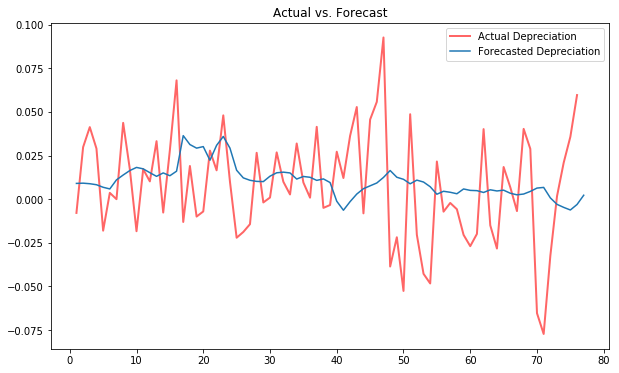

In [74]:
#实际值和UIP model值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yU1= df.loc[size_subsample: size_sample, 'lZA_1']
ax.plot(x, yU1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yU2= fcst_int
ax.plot(x, yU2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [75]:
#比值偏离度
devU1=(yU1-yU2)/yU2
devU1.describe()

count    76.000000
mean     -2.039378
std       8.116794
min     -44.417552
25%      -3.023479
50%      -1.209731
75%       1.206002
max      17.004521
Name: lZA_1, dtype: float64

In [76]:
#差值偏离度
devU2=yU1-yU2
devU2.describe()

count    76.000000
mean     -0.003226
std       0.032669
min      -0.083946
25%      -0.024919
50%      -0.007495
75%       0.020443
max       0.080172
Name: lZA_1, dtype: float64

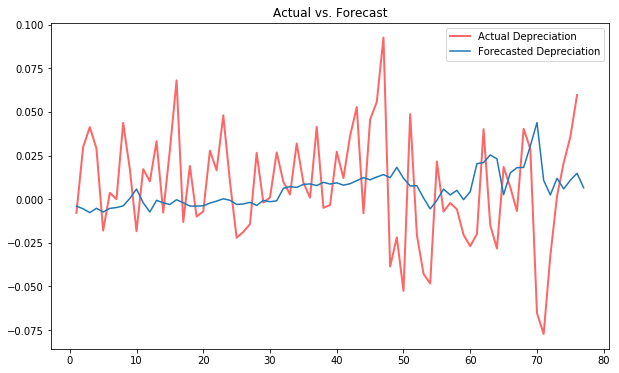

In [77]:
#实际值和泰勒值比较
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

yT1 = df.loc[size_subsample: size_sample, 'lZA_1']
ax.plot(x, yT1, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

yT2 = fcst_tr
ax.plot(x, yT2, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


In [78]:
#比值偏离度
devT1=(yT1-yT2)/yT2
devT1.describe()

count     76.000000
mean      -2.375799
std       37.849623
min     -218.006130
25%       -5.493439
50%       -1.189041
75%        2.591771
max      208.290780
Name: lZA_1, dtype: float64

In [79]:
devT2=yT1-yT2
devT2.describe()


count    76.000000
mean      0.001856
std       0.033693
min      -0.109170
25%      -0.014996
50%       0.001724
75%       0.025737
max       0.078548
Name: lZA_1, dtype: float64

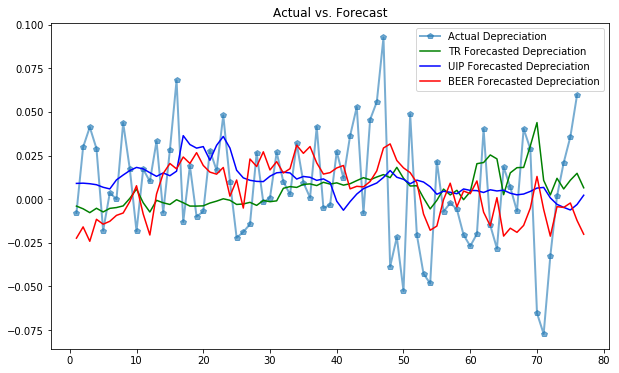

In [80]:
#预测线叠加
dfhw_d = dfhw.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

y1 = df.loc[size_subsample: size_sample, 'lZA_1']
ax.plot(x, y1, 'p-', linewidth=2, label='Actual Depreciation', alpha=0.6)


ax.plot(x, yT2, 'g-',label = 'TR Forecasted Depreciation')
ax.legend()


ax.plot(x, yU2, 'b-',label = 'UIP Forecasted Depreciation')
ax.legend()


ax.plot(x, yB2, 'r-',label = 'BEER Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()


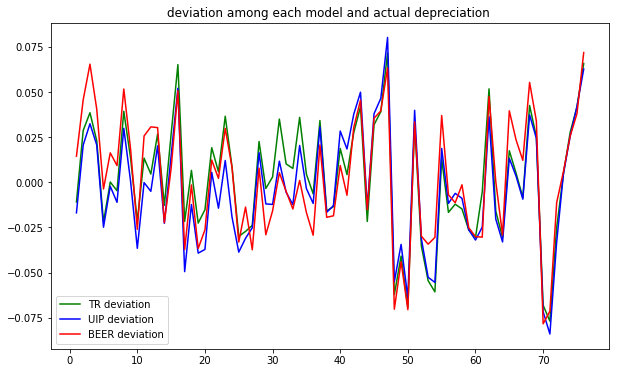

In [38]:
fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(77)
x = x.cumsum()

ax.plot(x, devT2, 'g-',label = 'TR deviation')
ax.legend()


ax.plot(x, devU2, 'b-',label = 'UIP deviation')
ax.legend()


ax.plot(x, devB2, 'r-',label = 'BEER deviation')
ax.legend()

ax.set_title('deviation among each model and actual depreciation ') 

plt.show()
